In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [218]:
# sensor_data_increased load
dataset_train = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/train_failure30_4.csv', header=0, engine='python')
dataset_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', 'label'],
      dtype='object')

In [219]:
#X = dataset_train
X = dataset_train[dataset_train['0']== 1]
#X = dataset_train[ (dataset_train['0']== 1) | (dataset_train['0']== 2)]
X[-20:]

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,label
301,1,302,10.0032,0.2510,100.0,489.05,605.03,1505.25,1314.19,10.52,...,2388.53,8162.78,8.4891,0.03,371,2319,100.00,29.00,17.4747,1
302,1,303,25.0037,0.6219,60.0,462.54,537.34,1269.72,1051.19,7.05,...,2028.62,7895.66,10.7020,0.02,309,1915,84.93,14.47,8.7987,1
303,1,304,42.0048,0.8406,100.0,445.00,549.63,1359.16,1133.32,3.91,...,2388.50,8123.32,9.1626,0.02,333,2212,100.00,10.62,6.4352,1
304,1,305,0.0016,0.0000,100.0,518.67,642.94,1598.86,1421.57,14.62,...,2388.33,8176.48,8.2561,0.03,396,2388,100.00,39.25,23.6714,1
305,1,306,10.0007,0.2500,100.0,489.05,605.24,1504.78,1321.70,10.52,...,2388.55,8164.40,8.5035,0.03,371,2319,100.00,28.87,17.3601,1
306,1,307,42.0038,0.8400,100.0,445.00,549.93,1363.45,1137.96,3.91,...,2388.51,8125.15,9.1589,0.02,332,2212,100.00,10.81,6.4590,1
307,1,308,42.0074,0.8412,100.0,445.00,549.88,1357.00,1132.47,3.91,...,2388.48,8126.42,9.1432,0.02,332,2212,100.00,10.66,6.4843,1
308,1,309,20.0038,0.7015,100.0,491.19,607.38,1495.68,1259.69,9.35,...,2388.64,8094.77,8.9928,0.03,367,2324,100.00,24.91,14.9363,1
309,1,310,42.0014,0.8400,100.0,445.00,549.86,1357.47,1141.17,3.91,...,2388.49,8130.04,9.1095,0.02,332,2212,100.00,10.71,6.5409,1
310,1,311,42.0044,0.8401,100.0,445.00,549.86,1364.90,1141.20,3.91,...,2388.50,8125.58,9.0937,0.02,332,2212,100.00,10.79,6.4548,1


In [220]:
#id_cycle_label = ['0','1','label']
#use_col = ['1','12','18','19','20','21','23']

#train_dataset = X[use_col]
train_dataset = X.iloc[:,2:-1]

In [221]:
pipe = Pipeline(steps= 
                [('scaler', StandardScaler()),
                 ('pca_3', PCA(n_components=3))])

In [222]:
### 선형 pca 학습
X_reduced = pipe.fit_transform(train_dataset.iloc[:,:-1])

sum(pipe.named_steps['pca_3'].explained_variance_ratio_)

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [224]:
pca_df = pd.DataFrame(X_reduced)

In [225]:
pca_df = pd.DataFrame(X_reduced)
pca_df_label = pd.concat([pca_df, dataset_train['label']], axis=1)
pca_df_label.head()

,0,1,2,label
0,-2.545098,-2.323041,-0.245539,0
1,1.750625,-0.411418,1.616952,0
2,-2.593827,-2.280689,-0.216545,0
3,-2.544036,-2.322597,-0.294365,0
4,-5.728404,3.797215,0.003727,0


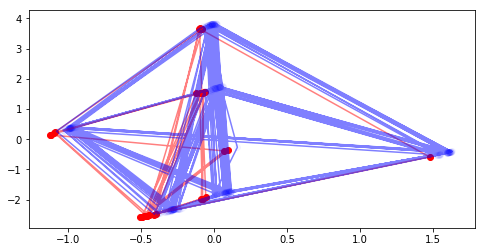

In [226]:
plt.figure(figsize=(8,4))
plt.scatter(pca_df_label.iloc[:,2][pca_df_label.label==1],pca_df_label.iloc[:,1][pca_df_label.label==1], c='r')
plt.plot(pca_df_label.iloc[:,2][pca_df_label.label==1],pca_df_label.iloc[:,1][pca_df_label.label==1], c='r', alpha=0.5)
plt.scatter(pca_df_label.iloc[:,2][pca_df_label.label==0],pca_df_label.iloc[:,1][pca_df_label.label==0], c='b', alpha=0.03)
plt.plot(pca_df_label.iloc[:,2][pca_df_label.label==0],pca_df_label.iloc[:,1][pca_df_label.label==0], c='b', alpha=0.5)

plt.show()

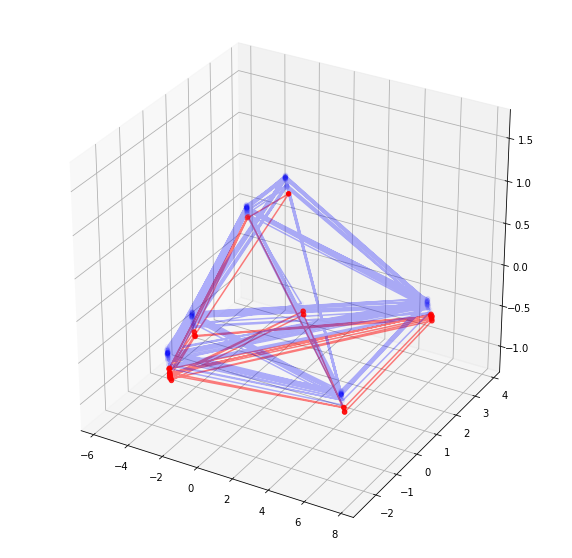

In [227]:
# 3차원 이미지 그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xs = pca_df_label.iloc[:,0][pca_df_label.label==1]
ys = pca_df_label.iloc[:,1][pca_df_label.label==1]
zs = pca_df_label.iloc[:,2][pca_df_label.label==1]
ax.plot(xs, ys, zs, c= 'r', alpha=0.5)
ax.scatter(xs, ys, zs, c='r')

xs = pca_df_label.iloc[:,0][pca_df_label.label==0]
ys = pca_df_label.iloc[:,1][pca_df_label.label==0]
zs = pca_df_label.iloc[:,2][pca_df_label.label==0]
ax.plot(xs, ys, zs, c= 'b', alpha=0.3)
ax.scatter(xs, ys, zs, c='b', alpha=0.03)

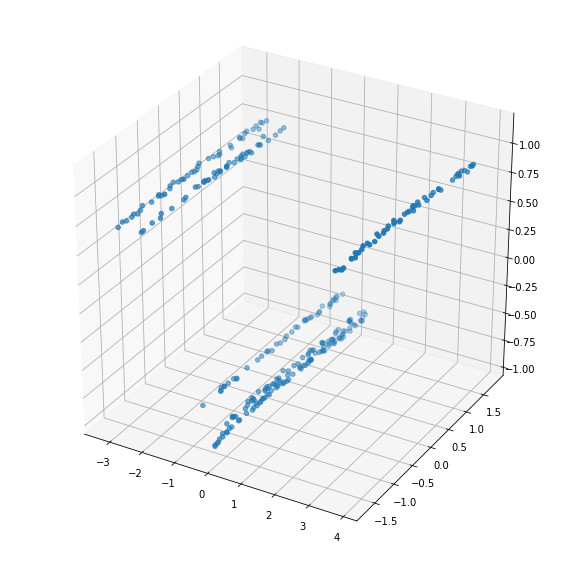

In [36]:
# 3차원 이미지 그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xs = pca_df_label.iloc[:,0][pca_df_label.label==0]
ys = pca_df_label.iloc[:,1][pca_df_label.label==0]
zs = pca_df_label.iloc[:,2][pca_df_label.label==0]
ax.scatter(xs, ys, zs)